## PES Analysis - all players at level 1

This analysis is based on the data scrapped from an onliine PES dataset. Due to the difficulty, I only got players' rating and their sub-scrores at level one. In the following, I will categorize them into groups by their position. Then, for different positions, we can generate different models for them.

In [1]:
# Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# packages for building up models
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

# packages for testing models
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


df = pd.read_excel(r'C:\Users\qiuwk\Google Drive\Projects\PES\PES_1.xlsx', index_col =0 )


In [2]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15031 entries, 1 to 15031
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 15031 non-null  object
 1   Height               15031 non-null  int64 
 2   Weight               15031 non-null  int64 
 3   Age                  15031 non-null  int64 
 4   Position             15031 non-null  object
 5   Offensive Awareness  15031 non-null  int64 
 6   Ball Control         15031 non-null  int64 
 7   Dribbling            15031 non-null  int64 
 8   Tight Possession     15031 non-null  int64 
 9   Low Pass             15031 non-null  int64 
 10  Lofted Pass          15031 non-null  int64 
 11  Finishing            15031 non-null  int64 
 12  Heading              15031 non-null  int64 
 13  Place Kicking        15031 non-null  int64 
 14  Curl                 15031 non-null  int64 
 15  Speed                15031 non-null  int64 
 16  Acce

In [3]:
# I want to change "Injury Resistance" into integer by running the following code: 
# df['Injury Resistance'].astype('int64')


# However, I failed.
# Therefore, I got a closer look at the values in this column.
df['Injury Resistance'].unique()


array(['3', '1', '2', '\xa0', 2], dtype=object)

In [4]:
# Now, I need to change the value and change the data type at the same time. 

df['Injury Resistance'].replace({'\xa0':0,"1":1,"2":2,"3":3},inplace  = True)

# After replacing, I double-checked if everything goes well.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15031 entries, 1 to 15031
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 15031 non-null  object
 1   Height               15031 non-null  int64 
 2   Weight               15031 non-null  int64 
 3   Age                  15031 non-null  int64 
 4   Position             15031 non-null  object
 5   Offensive Awareness  15031 non-null  int64 
 6   Ball Control         15031 non-null  int64 
 7   Dribbling            15031 non-null  int64 
 8   Tight Possession     15031 non-null  int64 
 9   Low Pass             15031 non-null  int64 
 10  Lofted Pass          15031 non-null  int64 
 11  Finishing            15031 non-null  int64 
 12  Heading              15031 non-null  int64 
 13  Place Kicking        15031 non-null  int64 
 14  Curl                 15031 non-null  int64 
 15  Speed                15031 non-null  int64 
 16  Acce

## Analysis

Since the "Injury Resistance" attracts me by its abnormal data type, I plan to start with an analysis on whether I should include this in my regressions.

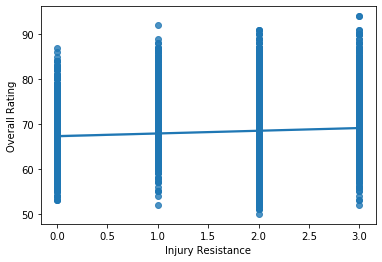

In [5]:
# Let's visualize it first.
sns.regplot(x= 'Injury Resistance', y = 'Overall Rating',data = df)

By looking at the graph, I can't say that there is a strong relationship between "Injury Resistance" and "Overall Rating." Also, the scale from 0 to 3 does not help a lot in derterming a player's performance. Therefore, I will abandon this variable for evalution.

Now, let's set up for the future analysis!

In [6]:
# I put all variables into a list for convenience.
variables = ['Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
             'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
             'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression','GK Awareness',
             'GK Catching','GK Clearing','GK Reflexes','GK Reach','Weak Foot Usage','Weak Foot Accuracy','Form']

# Now, we can take a look at the positions.

pos = df['Position'].unique().tolist()

print("we have " + str(len(variables)) + " variables and our positions include:")   
print(pos)

we have 31 variables and our positions include:
['LWF', 'RWF', 'CF', 'CB', 'GK', 'AMF', 'CMF', 'DMF', 'LB', 'SS', 'RB', 'RMF', 'LMF']


# WF (including LWF & RWF)

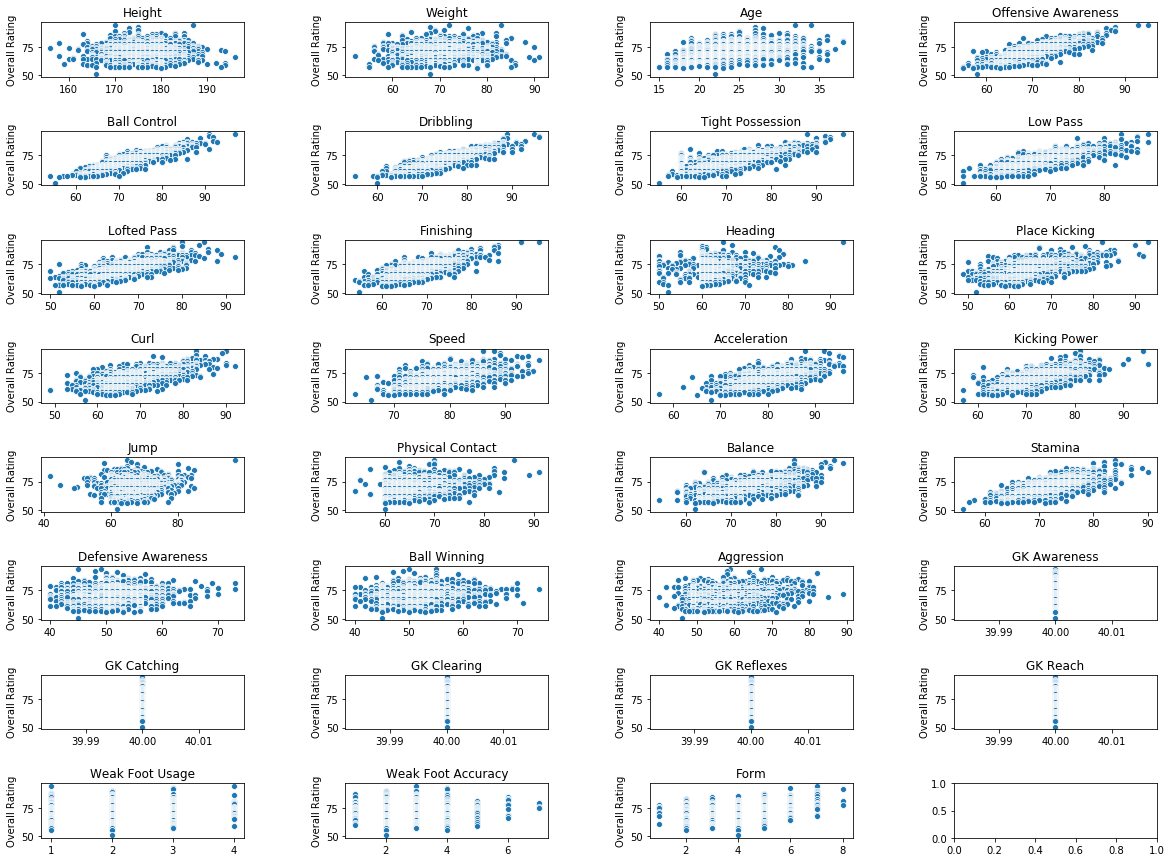

In [7]:
# Let's visualize all the factors first
fig, axes = plt.subplots(8,4,figsize = (20,15))

plt.subplots_adjust(wspace =0.5, hspace =1)

WF = df[(df['Position'] =='LWF')| (df['Position']=='RWF')]

row = 0
col = 0

for i in variables:
    
    sns.scatterplot(x= i, y = 'Overall Rating',data = WF, ax = axes [row][col]).set(title = i,xlabel = '')
    col += 1
    if col == 4:
        col = 0
        row +=1

Obviously, the five "GK" factors do not make a difference for all WFs. So, we need to take these variables out and take a look of the other variables.

In [8]:
# Update the variable
wf_variables = ['Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
                'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
                'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression',
                'Weak Foot Usage','Weak Foot Accuracy','Form']


X=WF.loc[:,('Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
            'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
            'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression',
            'Weak Foot Usage','Weak Foot Accuracy','Form')]

y=WF.loc[:,'Overall Rating']


# Split the data into the training set and the testing set
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, 
                                                                                           X_test.shape,y_test.shape))

linreg = LinearRegression()
model=linreg.fit(X_train, y_train)

X_train.shape=(989, 26)
 y_train.shape =(989,)
 X_test.shape=(424, 26)
,  y_test.shape=(424,)


In [9]:
# Try to create a dictionary to store the model
wf_model = {}

wf_model.update({'intercept': linreg.intercept_})

for i in wf_variables:
    wf_model.update({i:linreg.coef_[wf_variables.index(i)]})

# Transfer the dictionary into dataframe for visualization
wf_table = pd.DataFrame.from_dict(wf_model, orient='index').rename(columns = {0:'With Incercept (sklearn)'})

# To compare with, I add an OLS analysis without intercepts 
# (I also test that OLS produces the same result as Scikit-Learn if intercept included)
model = sm.OLS(y_train, X_train).fit()
wf_table['Without Intercept (OLS Result)'] = model.params
wf_table.fillna(0,inplace = True)

wf_table

,With Incercept (sklearn),Without Intercept (OLS Result)
intercept,-50.918744,0.000000
Height,0.002054,-0.239610
Weight,-0.010476,0.064022
Age,0.003735,0.015297
Offensive Awareness,0.134999,0.122223
Ball Control,0.159594,0.170354
Dribbling,0.152776,0.166055
Tight Possession,0.083310,0.091697
Low Pass,0.075694,0.062760
Lofted Pass,0.107650,0.107891


In [12]:
y_val = linreg.predict(X_test)
predictions = model.predict(X_test) 

print('MAE for the intercept-included model is: ' + str(mean_absolute_error(y_val, y_test)))
print('MSE for the intercept-included model is: ' + str(mean_squared_error(y_val, y_test)))
print('R-squre for the intercept-included model is: ' + str(r2_score(y_test, y_val)))
print('CV score for the intercept-included model is:')
print(cross_val_score(linreg, X_test, y_test, cv=5))


print('\nMAE for the intercept-excluded model is: ' + str(mean_absolute_error(predictions, y_test)))
print('MSE for the intercept-excluded model is: ' + str(mean_squared_error(predictions, y_test)))
print('R-squre for the intercept-excluded model is: ' + str(r2_score(y_test, predictions)))
print('CV score for the intercept-excluded model is:')

# I got error from using sklearn's cv score function on statsmodel by the following line
# print(cross_val_score(model, X_test, y_test, cv=5))
# As a solution, I need to use a SMWrapper from 
# https://stackoverflow.com/questions/41045752/using-statsmodel-estimations-with-scikit-learn-cross-validation-is-it-possible
from sklearn.base import BaseEstimator, RegressorMixin
class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)
    
print(cross_val_score(SMWrapper(model), X_test, y_test,scoring = None))
# However, it is not solved. So, I will skip it for the future analysis.

MAE for the intercept-included model is: 0.45943789418127073
MSE for the intercept-included model is: 0.3268245324299904
R-squre for the intercept-included model is: 0.991794321902759
CV score for the intercept-included model is:
[0.99235764 0.99156358 0.98838349 0.99163234 0.99104239]

MAE for the intercept-excluded model is: 1.0210260877744506
MSE for the intercept-excluded model is: 1.624419993037041
R-squre for the intercept-excluded model is: 0.959215217234527
CV score for the intercept-excluded model is:
[nan nan nan nan nan]


C:\Users\qiuwk\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'RegressionResultsWrapper' object is not callable

  FitFailedWarning)


__From previous analysis, the intercept-included model performs better and will give me a good prediction of a player's overall rating.__

# SS

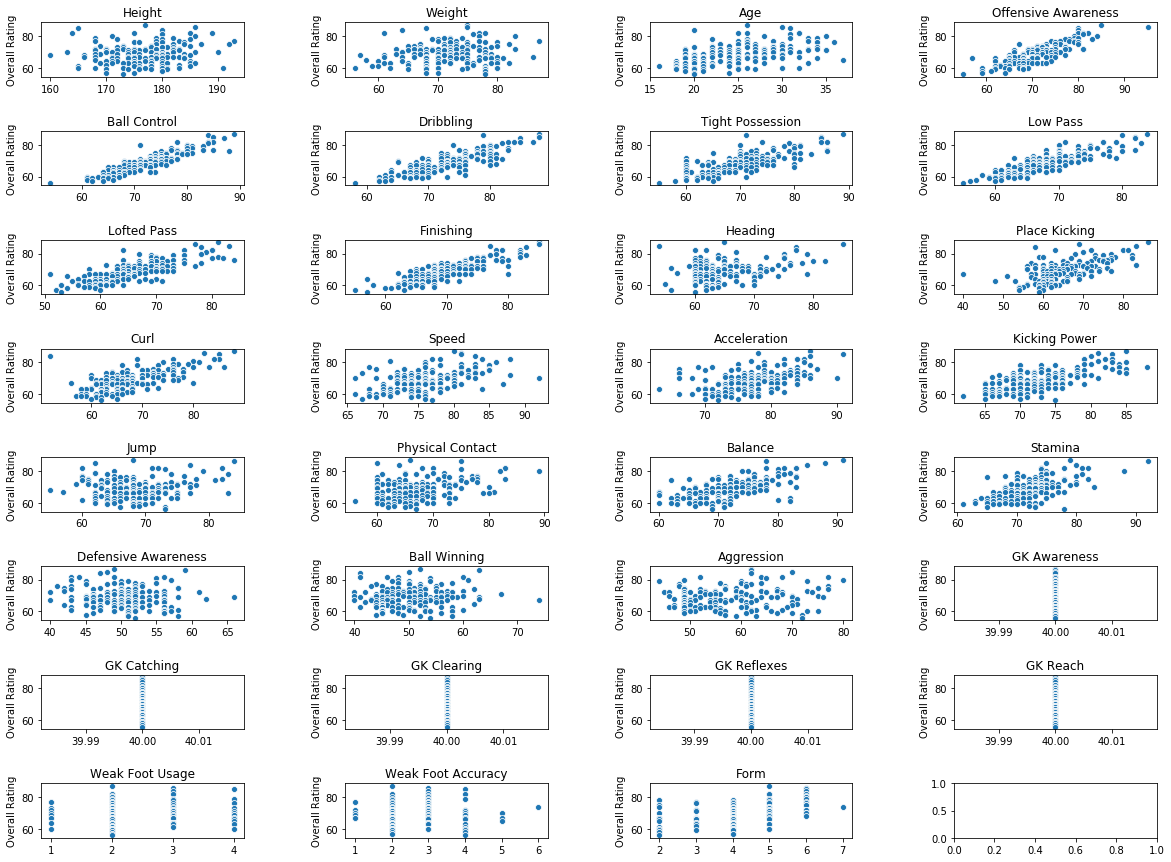

In [13]:
# Let's visualize all the factors first
fig, axes = plt.subplots(8,4,figsize = (20,15))

plt.subplots_adjust(wspace =0.5, hspace =1)

SS = df[(df['Position'] =='SS')]

row = 0
col = 0

for i in variables:
    
    sns.scatterplot(x= i, y = 'Overall Rating',data = SS, ax = axes [row][col]).set(title = i,xlabel = '')
    col += 1
    if col == 4:
        col = 0
        row +=1

Obviously, the five "GK" factors do not make a difference for all SSs. So, we need to take these variables out and take a look of the other variables.

In [14]:
# Update the variable
ss_variables = ['Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
                'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
                'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression',
                'Weak Foot Usage','Weak Foot Accuracy','Form']


X=SS.loc[:,('Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
            'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
            'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression',
            'Weak Foot Usage','Weak Foot Accuracy','Form')]

y=SS.loc[:,'Overall Rating']


# Split the data into the training set and the testing set
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, 
                                                                                           X_test.shape,y_test.shape))

linreg = LinearRegression()
model=linreg.fit(X_train, y_train)

X_train.shape=(123, 26)
 y_train.shape =(123,)
 X_test.shape=(54, 26)
,  y_test.shape=(54,)


In [15]:
# Try to create a dictionary to store the model
ss_model = {}

ss_model.update({'intercept': linreg.intercept_})

for i in ss_variables:
    ss_model.update({i:linreg.coef_[ss_variables.index(i)]})

# Transfer the dictionary into dataframe for visualization
ss_table = pd.DataFrame.from_dict(ss_model, orient='index').rename(columns = {0:'With Incercept (sklearn)'})

# To compare with, I add an OLS analysis without intercepts 
# (I also test that OLS produces the same result as Scikit-Learn if intercept included)
model = sm.OLS(y_train, X_train).fit()
ss_table['Wihtout Intercept (OLS Result)'] = model.params
ss_table.fillna(0,inplace = True)

ss_table

,With Incercept (sklearn),Wihtout Intercept (OLS Result)
intercept,-51.871485,0.000000
Height,-0.002427,-0.243719
Weight,0.011355,0.097528
Age,0.017190,0.003618
Offensive Awareness,0.167070,0.198926
Ball Control,0.163195,0.165541
Dribbling,0.114295,0.077054
Tight Possession,0.079797,0.066783
Low Pass,0.107480,0.199308
Lofted Pass,0.122464,0.085096


In [16]:
y_val = linreg.predict(X_test)
predictions = model.predict(X_test) 

print('MAE for the intercept-included model is: ' + str(mean_absolute_error(y_val, y_test)))
print('MSE for the intercept-included model is: ' + str(mean_squared_error(y_val, y_test)))
print('R-squre for the intercept-included model is: ' + str(r2_score(y_test, y_val)))
print('CV score for the intercept-included model is:')
print(cross_val_score(linreg, X_test, y_test, cv=5))


print('\nMAE for the intercept-excluded model is: ' + str(mean_absolute_error(predictions, y_test)))
print('MSE for the intercept-excluded model is: ' + str(mean_squared_error(predictions, y_test)))
print('R-squre for the intercept-excluded model is: ' + str(r2_score(y_test, predictions)))


MAE for the intercept-included model is: 0.5351734810623107
MSE for the intercept-included model is: 0.43419330014287233
R-squre for the intercept-included model is: 0.9896960540445928
CV score for the intercept-included model is:
[0.96935998 0.99139198 0.97555662 0.97884876 0.99036789]

MAE for the intercept-excluded model is: 1.2296708388754791
MSE for the intercept-excluded model is: 2.2546421296492376
R-squre for the intercept-excluded model is: 0.9464945436858526


__From previous analysis, the intercept-included model performs better and will give me a good prediction of a player's overall rating.__

# CF

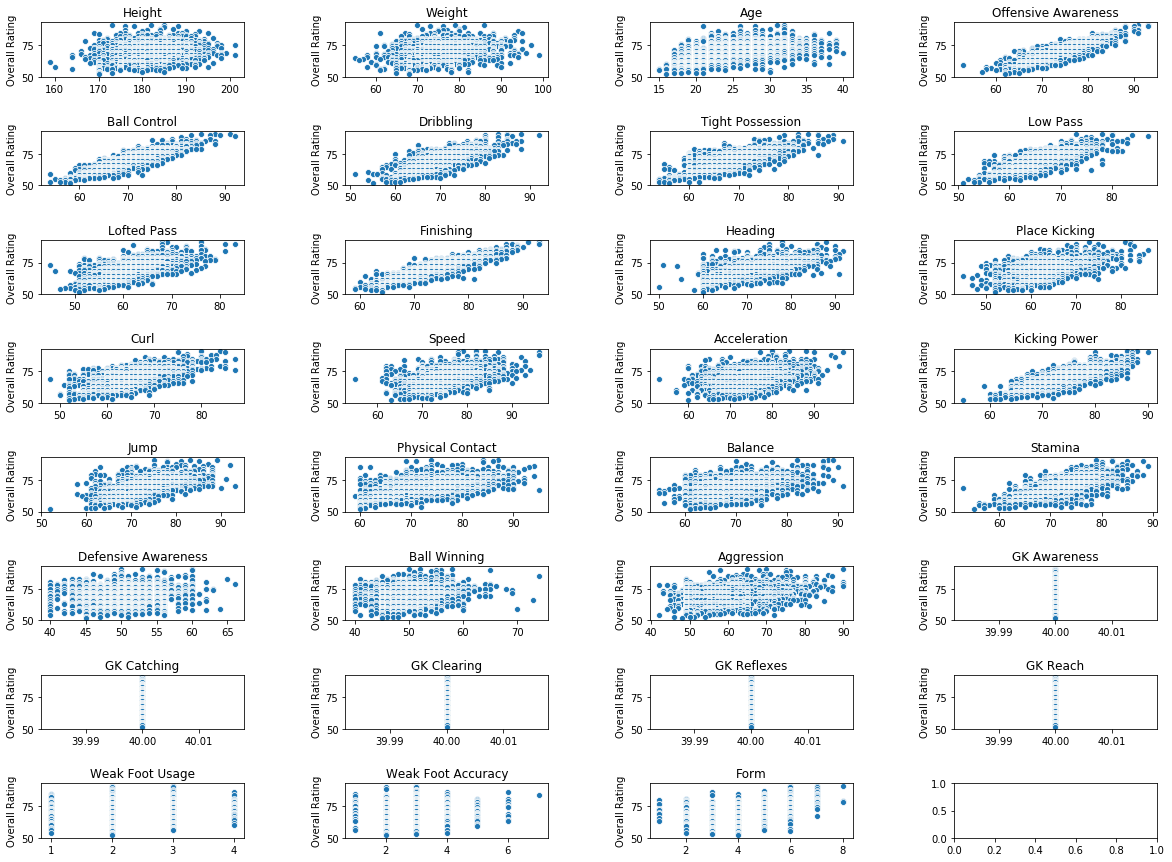

In [17]:
# Let's visualize all the factors first
fig, axes = plt.subplots(8,4,figsize = (20,15))

plt.subplots_adjust(wspace =0.5, hspace =1)

CF = df[(df['Position'] =='CF')]

row = 0
col = 0

for i in variables:
    
    sns.scatterplot(x= i, y = 'Overall Rating',data = CF, ax = axes [row][col]).set(title = i,xlabel = '')
    col += 1
    if col == 4:
        col = 0
        row +=1

Obviously, the five "GK" factors do not make a difference for all CFs. So, we need to take these variables out and take a look of the other variables.

In [18]:
# Update the variable
cf_variables = ['Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
                'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
                'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression',
                'Weak Foot Usage','Weak Foot Accuracy','Form']


X=CF.loc[:,('Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
            'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
            'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression',
            'Weak Foot Usage','Weak Foot Accuracy','Form')]

y=CF.loc[:,'Overall Rating']


# Split the data into the training set and the testing set
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, 
                                                                                           X_test.shape,y_test.shape))

linreg = LinearRegression()
model=linreg.fit(X_train, y_train)

X_train.shape=(1361, 26)
 y_train.shape =(1361,)
 X_test.shape=(584, 26)
,  y_test.shape=(584,)


In [19]:
# Try to create a dictionary to store the model
cf_model = {}

cf_model.update({'intercept': linreg.intercept_})

for i in cf_variables:
    cf_model.update({i:linreg.coef_[cf_variables.index(i)]})

# Transfer the dictionary into dataframe for visualization
cf_table = pd.DataFrame.from_dict(cf_model, orient='index').rename(columns = {0:'With Incercept (sklearn)'})

# To compare with, I add an OLS analysis without intercepts 
# (I also test that OLS produces the same result as Scikit-Learn if intercept included)
model = sm.OLS(y_train, X_train).fit()
cf_table['Without Intercept (OLS Result)'] = model.params
cf_table.fillna(0,inplace = True)

cf_table

,With Incercept (sklearn),Without Intercept (OLS Result)
intercept,-53.464639,0.000000
Height,0.005653,-0.250745
Weight,-0.003016,0.031265
Age,0.013626,-0.022097
Offensive Awareness,0.228210,0.225440
Ball Control,0.180397,0.205144
Dribbling,0.108333,0.101927
Tight Possession,0.069554,0.080482
Low Pass,0.044918,0.043649
Lofted Pass,0.053584,0.048274


In [20]:
y_val = linreg.predict(X_test)
predictions = model.predict(X_test) 

print('MAE for the intercept-included model is: ' + str(mean_absolute_error(y_val, y_test)))
print('MSE for the intercept-included model is: ' + str(mean_squared_error(y_val, y_test)))
print('R-squre for the intercept-included model is: ' + str(r2_score(y_test, y_val)))
print('CV score for the intercept-included model is:')
print(cross_val_score(linreg, X_test, y_test, cv=5))


print('\nMAE for the intercept-excluded model is: ' + str(mean_absolute_error(predictions, y_test)))
print('MSE for the intercept-excluded model is: ' + str(mean_squared_error(predictions, y_test)))
print('R-squre for the intercept-excluded model is: ' + str(r2_score(y_test, predictions)))


MAE for the intercept-included model is: 0.48802669167325285
MSE for the intercept-included model is: 0.4084091641122765
R-squre for the intercept-included model is: 0.9912297303629551
CV score for the intercept-included model is:
[0.99278034 0.99213444 0.99037408 0.98397671 0.99274203]

MAE for the intercept-excluded model is: 0.9939663472912271
MSE for the intercept-excluded model is: 1.629626059052357
R-squre for the intercept-excluded model is: 0.9650050459163672


__From previous analysis, the intercept-included model performs better and will give me a good prediction of a player's overall rating.__

# AMF

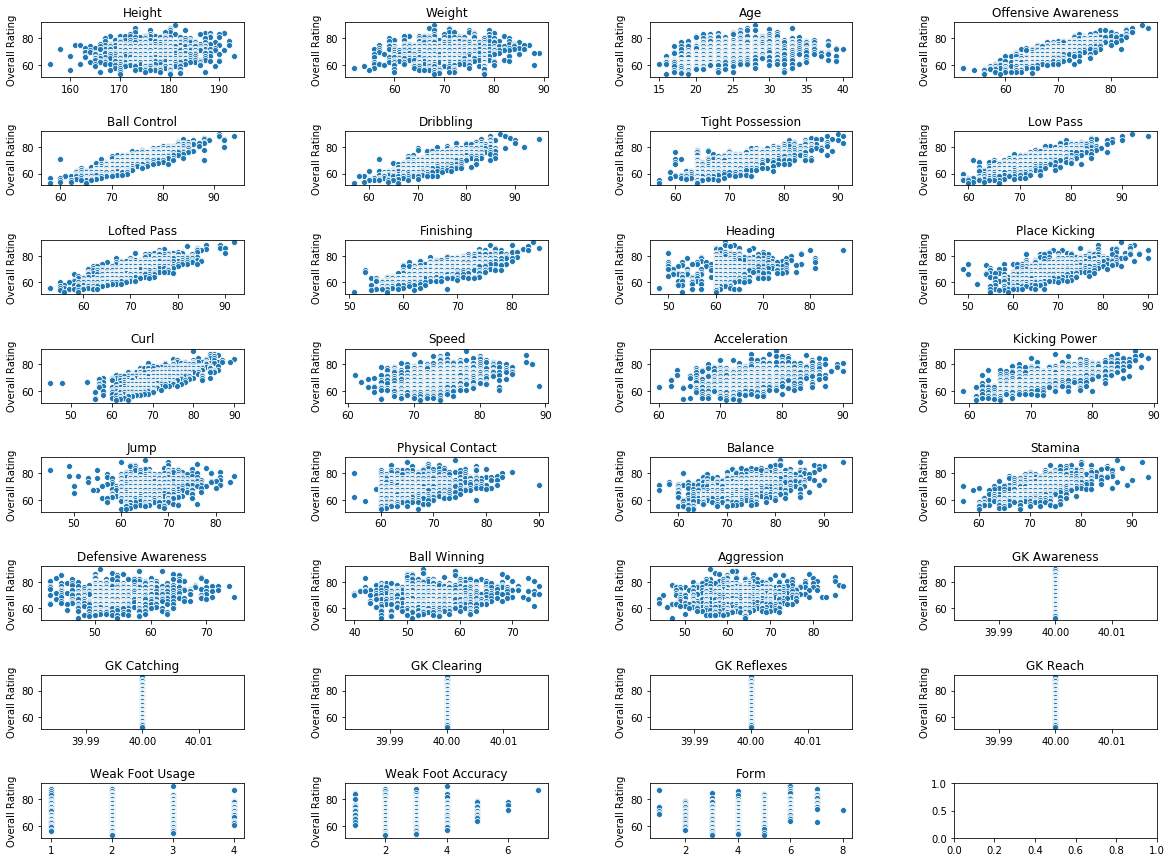

In [22]:
# Let's visualize all the factors first
fig, axes = plt.subplots(8,4,figsize = (20,15))

plt.subplots_adjust(wspace =0.5, hspace =1)

AMF = df[(df['Position'] =='AMF')]

row = 0
col = 0

for i in variables:
    
    sns.scatterplot(x= i, y = 'Overall Rating',data = AMF, ax = axes [row][col]).set(title = i,xlabel = '')
    col += 1
    if col == 4:
        col = 0
        row +=1

Obviously, the five "GK" factors do not make a difference for all AMFs. So, we need to take these variables out and take a look of the other variables.

In [23]:
# Update the variable
amf_variables = ['Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
                'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
                'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression',
                'Weak Foot Usage','Weak Foot Accuracy','Form']


X=AMF.loc[:,('Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
            'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
            'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression',
            'Weak Foot Usage','Weak Foot Accuracy','Form')]

y=AMF.loc[:,'Overall Rating']


# Split the data into the training set and the testing set
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, 
                                                                                           X_test.shape,y_test.shape))

linreg = LinearRegression()
model=linreg.fit(X_train, y_train)

X_train.shape=(702, 26)
 y_train.shape =(702,)
 X_test.shape=(302, 26)
,  y_test.shape=(302,)


In [24]:
# Try to create a dictionary to store the model
amf_model = {}

amf_model.update({'intercept': linreg.intercept_})

for i in amf_variables:
    amf_model.update({i:linreg.coef_[amf_variables.index(i)]})

# Transfer the dictionary into dataframe for visualization
amf_table = pd.DataFrame.from_dict(amf_model, orient='index').rename(columns = {0:'With Incercept (sklearn)'})

# To compare with, I add an OLS analysis without intercepts 
# (I also test that OLS produces the same result as Scikit-Learn if intercept included)
model = sm.OLS(y_train, X_train).fit()
amf_table['Without Intercept (OLS Result)'] = model.params
amf_table.fillna(0,inplace = True)

amf_table

,With Incercept (sklearn),Without Intercept (OLS Result)
intercept,-52.476665,0.000000
Height,0.002716,-0.236099
Weight,-0.004718,0.047318
Age,0.015798,-0.032493
Offensive Awareness,0.133750,0.127049
Ball Control,0.207797,0.232992
Dribbling,0.135186,0.144219
Tight Possession,0.074860,0.069429
Low Pass,0.168043,0.181835
Lofted Pass,0.130382,0.097716


In [25]:
y_val = linreg.predict(X_test)
predictions = model.predict(X_test) 

print('MAE for the intercept-included model is: ' + str(mean_absolute_error(y_val, y_test)))
print('MSE for the intercept-included model is: ' + str(mean_squared_error(y_val, y_test)))
print('R-squre for the intercept-included model is: ' + str(r2_score(y_test, y_val)))
print('CV score for the intercept-included model is:')
print(cross_val_score(linreg, X_test, y_test, cv=5))


print('\nMAE for the intercept-excluded model is: ' + str(mean_absolute_error(predictions, y_test)))
print('MSE for the intercept-excluded model is: ' + str(mean_squared_error(predictions, y_test)))
print('R-squre for the intercept-excluded model is: ' + str(r2_score(y_test, predictions)))

MAE for the intercept-included model is: 0.4382469834673175
MSE for the intercept-included model is: 0.28989850461260913
R-squre for the intercept-included model is: 0.9926950958842107
CV score for the intercept-included model is:
[0.99036914 0.99403554 0.99063103 0.99245625 0.99114123]

MAE for the intercept-excluded model is: 1.0309984442297853
MSE for the intercept-excluded model is: 1.687438326868267
R-squre for the intercept-excluded model is: 0.9574796869147267


__From previous analysis, the intercept-included model performs better and will give me a good prediction of a player's overall rating.__

# CMF

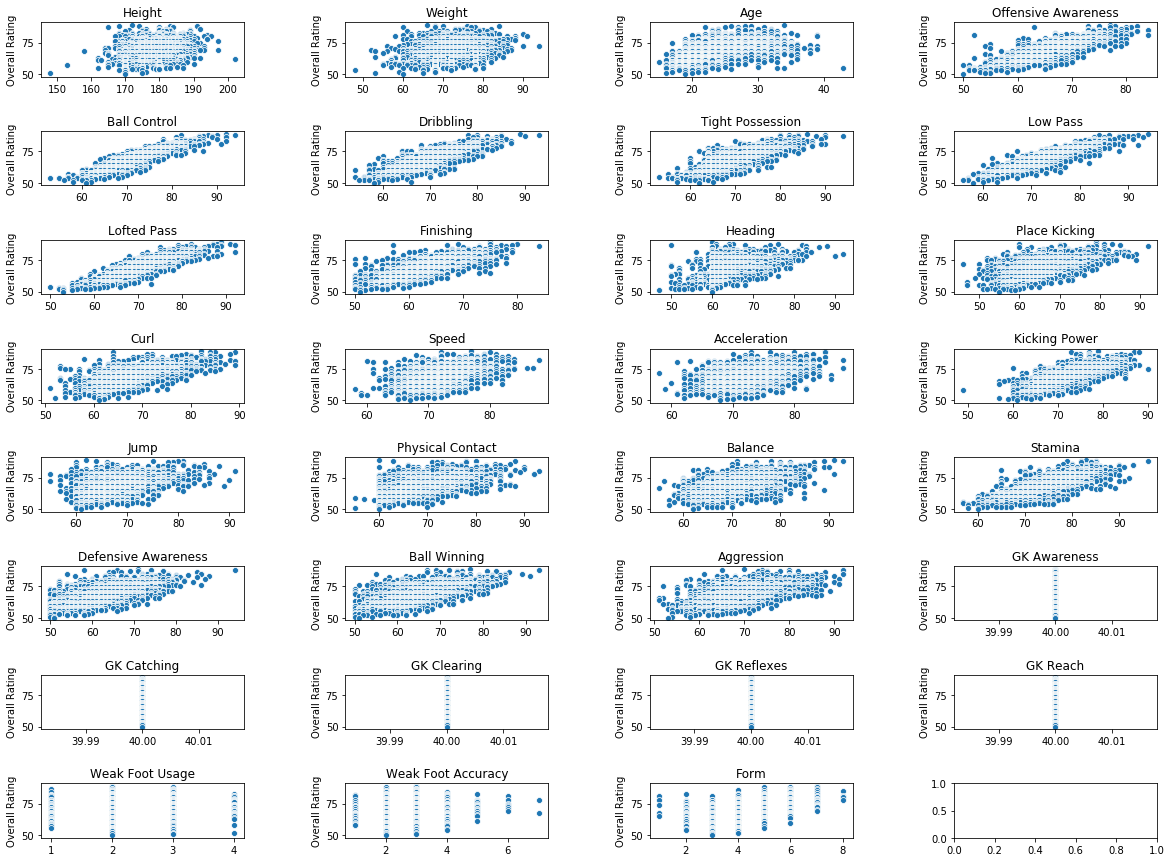

In [26]:
# Let's visualize all the factors first
fig, axes = plt.subplots(8,4,figsize = (20,15))

plt.subplots_adjust(wspace =0.5, hspace =1)

CMF = df[(df['Position'] =='CMF')]

row = 0
col = 0

for i in variables:
    
    sns.scatterplot(x= i, y = 'Overall Rating',data = CMF, ax = axes [row][col]).set(title = i,xlabel = '')
    col += 1
    if col == 4:
        col = 0
        row +=1

Obviously, the five "GK" factors do not make a difference for all CMFs. So, we need to take these variables out and take a look of the other variables.

In [27]:
# Update the variable
cmf_variables = ['Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
                'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
                'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression',
                'Weak Foot Usage','Weak Foot Accuracy','Form']


X=CMF.loc[:,('Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
            'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
            'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression',
            'Weak Foot Usage','Weak Foot Accuracy','Form')]

y=CMF.loc[:,'Overall Rating']


# Split the data into the training set and the testing set
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, 
                                                                                           X_test.shape,y_test.shape))

linreg = LinearRegression()
model=linreg.fit(X_train, y_train)

X_train.shape=(1382, 26)
 y_train.shape =(1382,)
 X_test.shape=(593, 26)
,  y_test.shape=(593,)


In [28]:
# Try to create a dictionary to store the model
cmf_model = {}

cmf_model.update({'intercept': linreg.intercept_})

for i in cmf_variables:
    cmf_model.update({i:linreg.coef_[cmf_variables.index(i)]})

# Transfer the dictionary into dataframe for visualization
cmf_table = pd.DataFrame.from_dict(cmf_model, orient='index').rename(columns = {0:'With Incercept (sklearn)'})

# To compare with, I add an OLS analysis without intercepts 
# (I also test that OLS produces the same result as Scikit-Learn if intercept included)
model = sm.OLS(y_train, X_train).fit()
cmf_table['Without Intercept (OLS Result)'] = model.params
cmf_table.fillna(0,inplace = True)

cmf_table

,With Incercept (sklearn),Without Intercept (OLS Result)
intercept,-52.947055,0.000000
Height,0.014965,-0.243208
Weight,-0.008207,0.039519
Age,0.018969,-0.005183
Offensive Awareness,0.076577,0.070428
Ball Control,0.191543,0.233809
Dribbling,0.128723,0.126884
Tight Possession,0.082394,0.084086
Low Pass,0.187743,0.188170
Lofted Pass,0.161381,0.140030


In [29]:
y_val = linreg.predict(X_test)
predictions = model.predict(X_test) 

print('MAE for the intercept-included model is: ' + str(mean_absolute_error(y_val, y_test)))
print('MSE for the intercept-included model is: ' + str(mean_squared_error(y_val, y_test)))
print('R-squre for the intercept-included model is: ' + str(r2_score(y_test, y_val)))
print('CV score for the intercept-included model is:')
print(cross_val_score(linreg, X_test, y_test, cv=5))


print('\nMAE for the intercept-excluded model is: ' + str(mean_absolute_error(predictions, y_test)))
print('MSE for the intercept-excluded model is: ' + str(mean_squared_error(predictions, y_test)))
print('R-squre for the intercept-excluded model is: ' + str(r2_score(y_test, predictions)))


MAE for the intercept-included model is: 0.47795238790536965
MSE for the intercept-included model is: 0.3596803644157769
R-squre for the intercept-included model is: 0.993289699807922
CV score for the intercept-included model is:
[0.99148366 0.99417641 0.99371802 0.99078895 0.99376907]

MAE for the intercept-excluded model is: 1.0557424186072344
MSE for the intercept-excluded model is: 1.7796219686574057
R-squre for the intercept-excluded model is: 0.9667988613793114


__From previous analysis, the intercept-included model performs better and will give me a good prediction of a player's overall rating.__

# LMF/RMF

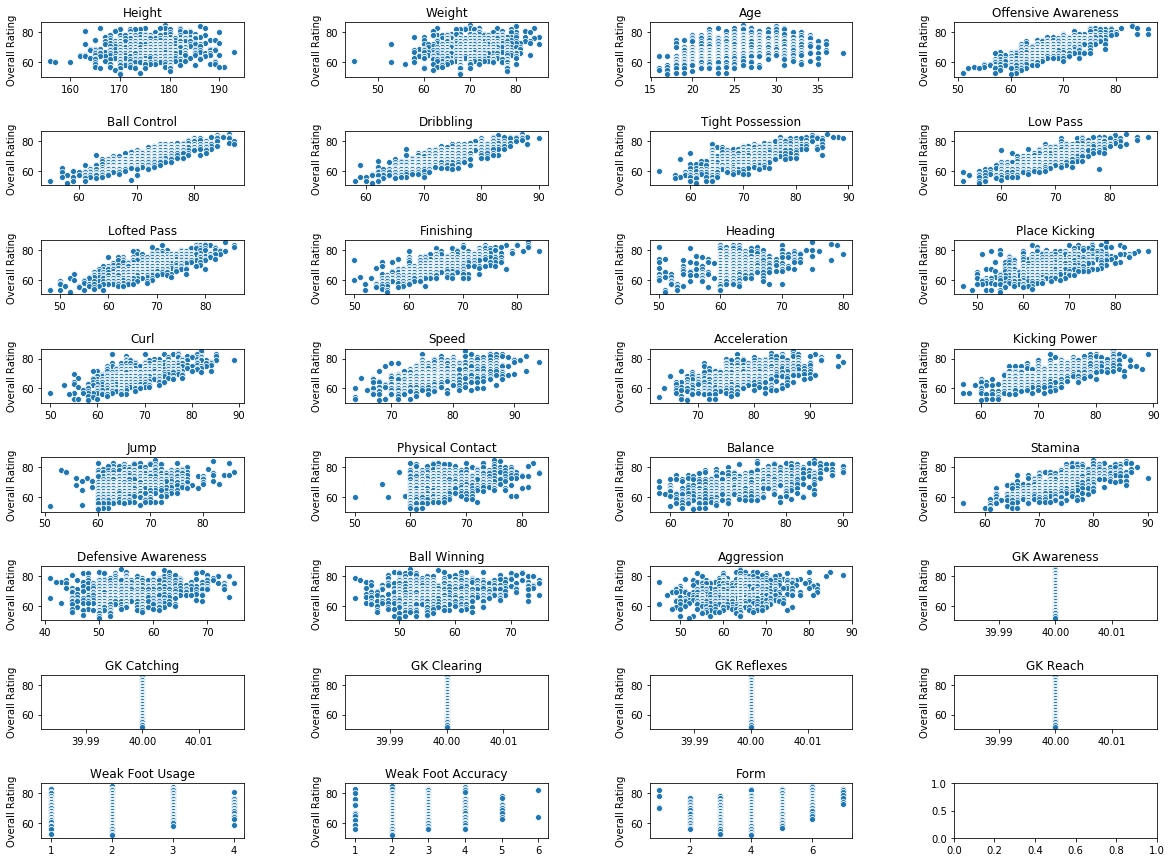

In [30]:
# Let's visualize all the factors first
fig, axes = plt.subplots(8,4,figsize = (20,15))

plt.subplots_adjust(wspace =0.5, hspace =1)

MF = df[(df['Position'] =='LMF')| (df['Position']=='RMF')]

row = 0
col = 0

for i in variables:
    
    sns.scatterplot(x= i, y = 'Overall Rating',data = MF, ax = axes [row][col]).set(title = i,xlabel = '')
    col += 1
    if col == 4:
        col = 0
        row +=1

Obviously, the five "GK" factors do not make a difference for all MFs. So, we need to take these variables out and take a look of the other variables.

In [31]:
# Update the variable
mf_variables = ['Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
                'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
                'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression',
                'Weak Foot Usage','Weak Foot Accuracy','Form']


X=MF.loc[:,('Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
            'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
            'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression',
            'Weak Foot Usage','Weak Foot Accuracy','Form')]

y=MF.loc[:,'Overall Rating']


# Split the data into the training set and the testing set
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, 
                                                                                           X_test.shape,y_test.shape))

linreg = LinearRegression()
model=linreg.fit(X_train, y_train)

X_train.shape=(539, 26)
 y_train.shape =(539,)
 X_test.shape=(232, 26)
,  y_test.shape=(232,)


In [32]:
# Try to create a dictionary to store the model
mf_model = {}

mf_model.update({'intercept': linreg.intercept_})

for i in mf_variables:
    mf_model.update({i:linreg.coef_[mf_variables.index(i)]})

# Transfer the dictionary into dataframe for visualization
mf_table = pd.DataFrame.from_dict(mf_model, orient='index').rename(columns = {0:'With Incercept (sklearn)'})

# To compare with, I add an OLS analysis without intercepts 
# (I also test that OLS produces the same result as Scikit-Learn if intercept included)
model = sm.OLS(y_train, X_train).fit()
mf_table['Without Intercept (OLS Result)'] = model.params
mf_table.fillna(0,inplace = True)

mf_table

,With Incercept (sklearn),Without Intercept (OLS Result)
intercept,-51.085979,0.000000
Height,0.005809,-0.240247
Weight,-0.003689,0.071814
Age,0.017064,0.004689
Offensive Awareness,0.098555,0.078526
Ball Control,0.137287,0.163185
Dribbling,0.148143,0.106481
Tight Possession,0.091203,0.075427
Low Pass,0.093922,0.106031
Lofted Pass,0.109352,0.148741


In [33]:
y_val = linreg.predict(X_test)
predictions = model.predict(X_test) 

print('MAE for the intercept-included model is: ' + str(mean_absolute_error(y_val, y_test)))
print('MSE for the intercept-included model is: ' + str(mean_squared_error(y_val, y_test)))
print('R-squre for the intercept-included model is: ' + str(r2_score(y_test, y_val)))
print('CV score for the intercept-included model is:')
print(cross_val_score(linreg, X_test, y_test, cv=5))


print('\nMAE for the intercept-excluded model is: ' + str(mean_absolute_error(predictions, y_test)))
print('MSE for the intercept-excluded model is: ' + str(mean_squared_error(predictions, y_test)))
print('R-squre for the intercept-excluded model is: ' + str(r2_score(y_test, predictions)))

MAE for the intercept-included model is: 0.4449421762123848
MSE for the intercept-included model is: 0.31839669463916
R-squre for the intercept-included model is: 0.9907256356846634
CV score for the intercept-included model is:
[0.98734857 0.99188687 0.99053385 0.99081846 0.98491572]

MAE for the intercept-excluded model is: 1.0506749322143623
MSE for the intercept-excluded model is: 1.6494821477006707
R-squre for the intercept-excluded model is: 0.9519533379994507


__From previous analysis, the intercept-included model performs better and will give me a good prediction of a player's overall rating.__

# DMF

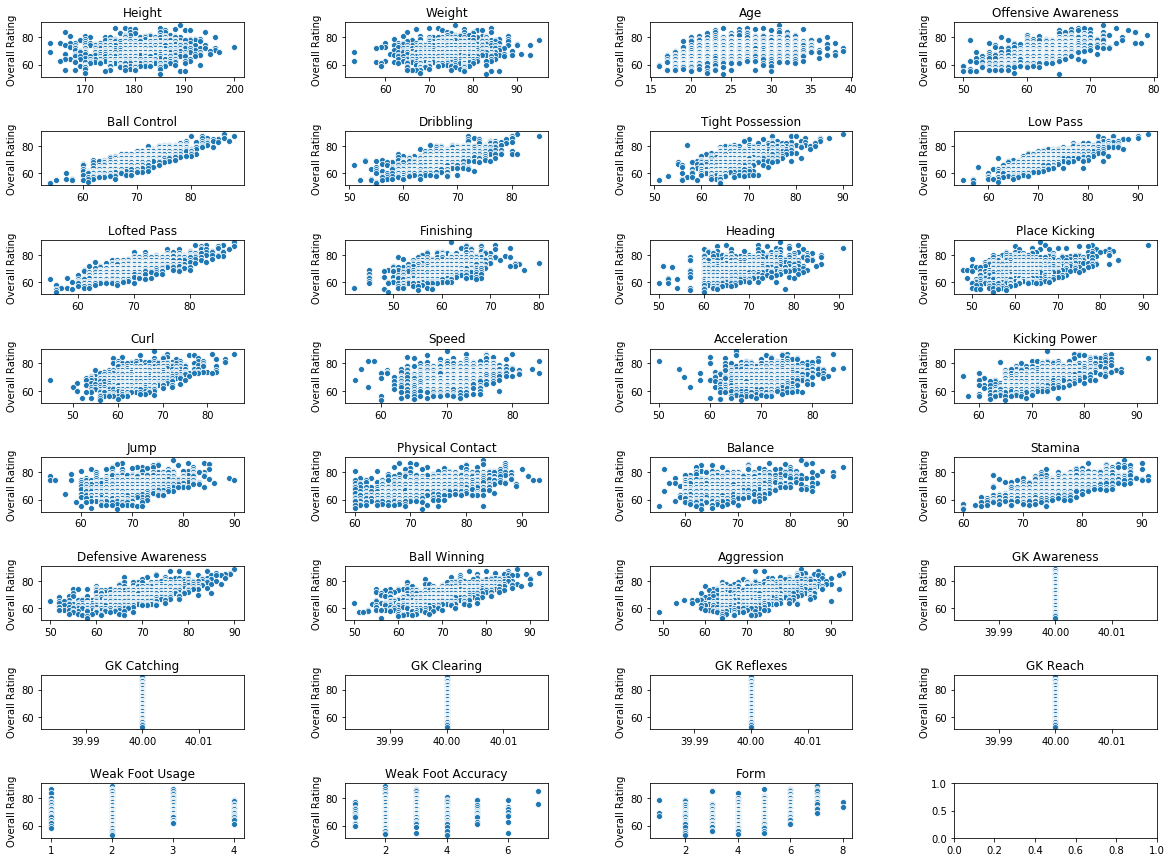

In [34]:
# Let's visualize all the factors first
fig, axes = plt.subplots(8,4,figsize = (20,15))

plt.subplots_adjust(wspace =0.5, hspace =1)

DMF = df[(df['Position'] =='DMF')]

row = 0
col = 0

for i in variables:
    
    sns.scatterplot(x= i, y = 'Overall Rating',data = DMF, ax = axes [row][col]).set(title = i,xlabel = '')
    col += 1
    if col == 4:
        col = 0
        row +=1

Obviously, the five "GK" factors do not make a difference for all DMFs. So, we need to take these variables out and take a look of the other variables.

In [35]:
# Update the variable
dmf_variables = ['Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
                'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
                'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression',
                'Weak Foot Usage','Weak Foot Accuracy','Form']


X=DMF.loc[:,('Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
            'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
            'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression',
            'Weak Foot Usage','Weak Foot Accuracy','Form')]

y=DMF.loc[:,'Overall Rating']


# Split the data into the training set and the testing set
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, 
                                                                                           X_test.shape,y_test.shape))

linreg = LinearRegression()
model=linreg.fit(X_train, y_train)

X_train.shape=(769, 26)
 y_train.shape =(769,)
 X_test.shape=(330, 26)
,  y_test.shape=(330,)


In [36]:
# Try to create a dictionary to store the model
dmf_model = {}

dmf_model.update({'intercept': linreg.intercept_})

for i in dmf_variables:
    dmf_model.update({i:linreg.coef_[dmf_variables.index(i)]})

# Transfer the dictionary into dataframe for visualization
dmf_table = pd.DataFrame.from_dict(dmf_model, orient='index').rename(columns = {0:'With Incercept (sklearn)'})

# To compare with, I add an OLS analysis without intercepts 
# (I also test that OLS produces the same result as Scikit-Learn if intercept included)
model = sm.OLS(y_train, X_train).fit()
dmf_table['Without Intercept (OLS Result)'] = model.params
dmf_table.fillna(0,inplace = True)

dmf_table

,With Incercept (sklearn),Without Intercept (OLS Result)
intercept,-51.471187,0.000000
Height,-0.001240,-0.231517
Weight,-0.002022,0.049379
Age,0.011631,-0.020676
Offensive Awareness,0.112355,0.093855
Ball Control,0.149907,0.200938
Dribbling,0.085799,0.065156
Tight Possession,0.066985,0.062857
Low Pass,0.151520,0.146684
Lofted Pass,0.162982,0.164242


In [37]:
y_val = linreg.predict(X_test)
predictions = model.predict(X_test) 

print('MAE for the intercept-included model is: ' + str(mean_absolute_error(y_val, y_test)))
print('MSE for the intercept-included model is: ' + str(mean_squared_error(y_val, y_test)))
print('R-squre for the intercept-included model is: ' + str(r2_score(y_test, y_val)))
print('CV score for the intercept-included model is:')
print(cross_val_score(linreg, X_test, y_test, cv=5))


print('\n' + 'MAE for the intercept-excluded model is: ' + str(mean_absolute_error(predictions, y_test)))
print('MSE for the intercept-excluded model is: ' + str(mean_squared_error(predictions, y_test)))
print('R-squre for the intercept-excluded model is: ' + str(r2_score(y_test, predictions)))


MAE for the intercept-included model is: 0.4409717630140316
MSE for the intercept-included model is: 0.3056483170444083
R-squre for the intercept-included model is: 0.9914690771391609
CV score for the intercept-included model is:
[0.99198464 0.99222751 0.98789153 0.99121155 0.98687838]

MAE for the intercept-excluded model is: 0.9060700961606503
MSE for the intercept-excluded model is: 1.366241689484038
R-squre for the intercept-excluded model is: 0.9618669503076065


__From previous analysis, the intercept-included model performs better and will give me a good prediction of a player's overall rating.__

# CB

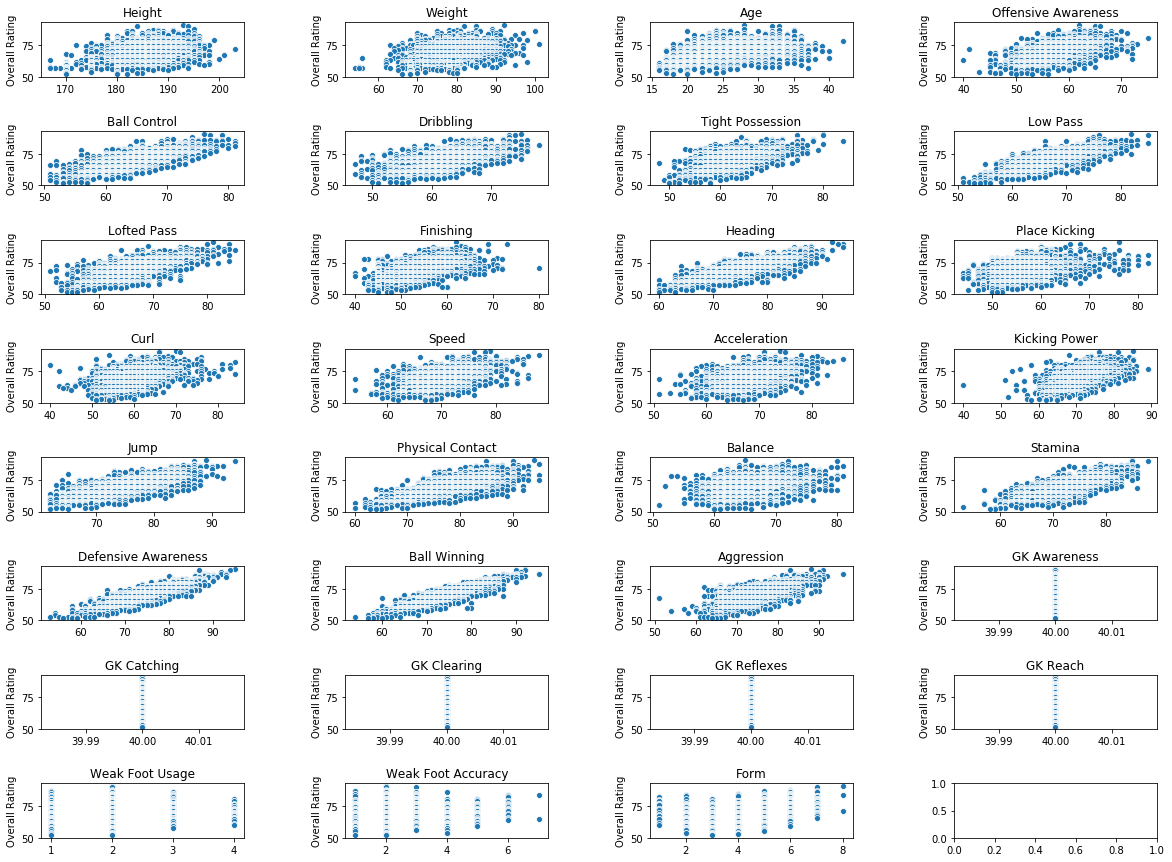

In [38]:
# Let's visualize all the factors first
fig, axes = plt.subplots(8,4,figsize = (20,15))

plt.subplots_adjust(wspace =0.5, hspace =1)

CB = df[(df['Position'] =='CB')]

row = 0
col = 0

for i in variables:
    
    sns.scatterplot(x= i, y = 'Overall Rating',data = CB, ax = axes [row][col]).set(title = i,xlabel = '')
    col += 1
    if col == 4:
        col = 0
        row +=1

Obviously, the five "GK" factors do not make a difference for all CBs. So, we need to take these variables out and take a look of the other variables.

In [39]:
# Update the variable
cb_variables = ['Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
                'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
                'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression',
                'Weak Foot Usage','Weak Foot Accuracy','Form']


X=CB.loc[:,('Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
            'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
            'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression',
            'Weak Foot Usage','Weak Foot Accuracy','Form')]

y=CB.loc[:,'Overall Rating']


# Split the data into the training set and the testing set
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, 
                                                                                           X_test.shape,y_test.shape))

linreg = LinearRegression()
model=linreg.fit(X_train, y_train)

X_train.shape=(1808, 26)
 y_train.shape =(1808,)
 X_test.shape=(776, 26)
,  y_test.shape=(776,)


In [40]:
# Try to create a dictionary to store the model
cb_model = {}

cb_model.update({'intercept': linreg.intercept_})

for i in cb_variables:
    cb_model.update({i:linreg.coef_[cb_variables.index(i)]})

# Transfer the dictionary into dataframe for visualization
cb_table = pd.DataFrame.from_dict(cb_model, orient='index').rename(columns = {0:'With Incercept (sklearn)'})

# To compare with, I add an OLS analysis without intercepts 
# (I also test that OLS produces the same result as Scikit-Learn if intercept included)
model = sm.OLS(y_train, X_train).fit()
cb_table['Without Intercept (OLS Result)'] = model.params
cb_table.fillna(0,inplace = True)

cb_table

,With Incercept (sklearn),Without Intercept (OLS Result)
intercept,-52.009184,0.000000
Height,0.003740,-0.239560
Weight,0.003378,0.037525
Age,0.014933,-0.009405
Offensive Awareness,0.046924,0.041830
Ball Control,0.069910,0.105280
Dribbling,0.031505,0.034698
Tight Possession,0.033249,0.016064
Low Pass,0.037488,0.041480
Lofted Pass,0.048065,0.040911


In [41]:
y_val = linreg.predict(X_test)
predictions = model.predict(X_test) 

print('MAE for the intercept-included model is: ' + str(mean_absolute_error(y_val, y_test)))
print('MSE for the intercept-included model is: ' + str(mean_squared_error(y_val, y_test)))
print('R-squre for the intercept-included model is: ' + str(r2_score(y_test, y_val)))
print('CV score for the intercept-included model is:')
print(cross_val_score(linreg, X_test, y_test, cv=5))


print('\nMAE for the intercept-included model is: ' + str(mean_absolute_error(predictions, y_test)))
print('MSE for the intercept-included model is: ' + str(mean_squared_error(predictions, y_test)))
print('R-squre for the intercept-included model is: ' + str(r2_score(y_test, predictions)))


MAE for the intercept-included model is: 0.4713609108853795
MSE for the intercept-included model is: 0.3595109539499666
R-squre for the intercept-included model is: 0.9919411194161268
CV score for the intercept-included model is:
[0.99092811 0.99204335 0.99135782 0.99168784 0.99117846]

MAE for the intercept-included model is: 0.9477474966009374
MSE for the intercept-included model is: 1.519473495745755
R-squre for the intercept-included model is: 0.9659391311501468


__From previous analysis, the intercept-included model performs better and will give me a good prediction of a player's overall rating.__

# SB (LB/RB)

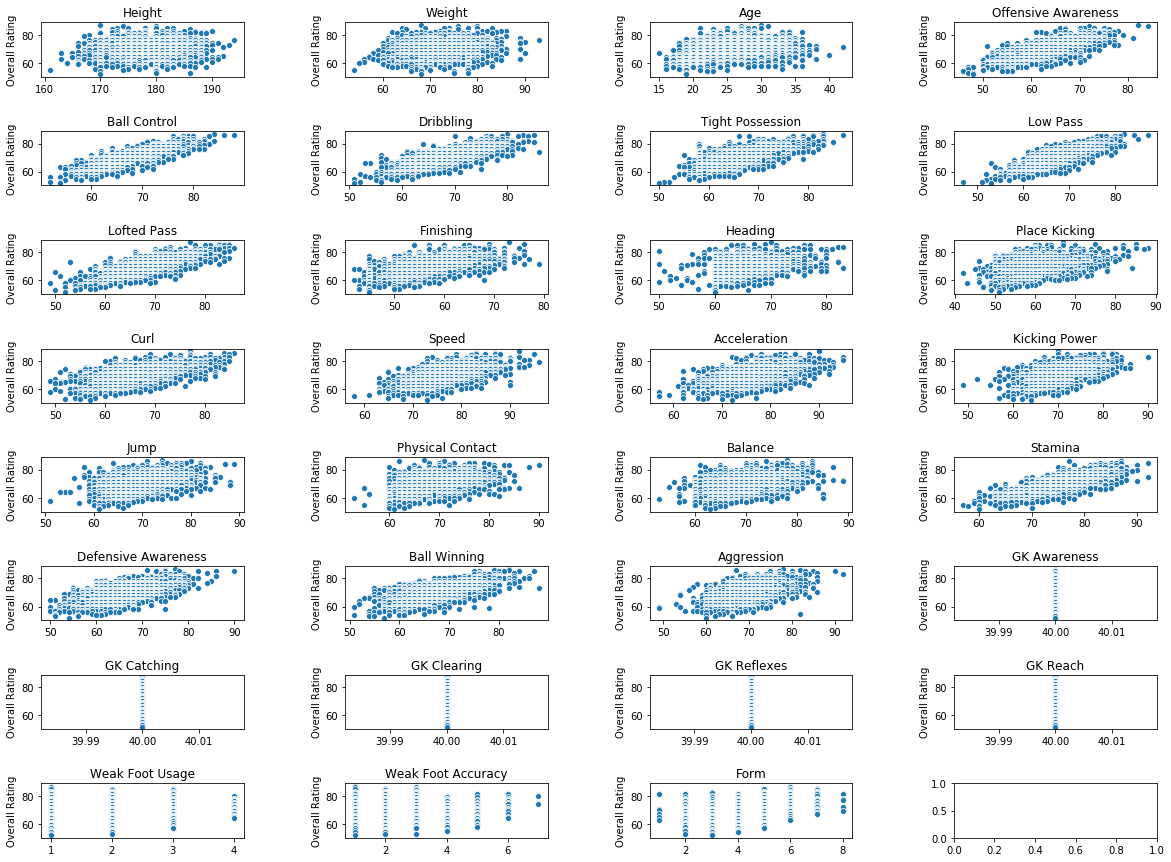

In [42]:
# Let's visualize all the factors first
fig, axes = plt.subplots(8,4,figsize = (20,15))

plt.subplots_adjust(wspace =0.5, hspace =1)

SB = df[(df['Position'] =='LB') | (df['Position'] =='RB')]

row = 0
col = 0

for i in variables:
    
    sns.scatterplot(x= i, y = 'Overall Rating',data = SB, ax = axes [row][col]).set(title = i,xlabel = '')
    col += 1
    if col == 4:
        col = 0
        row +=1

Obviously, the five "GK" factors do not make a difference for all SBs. So, we need to take these variables out and take a look of the other variables.

In [43]:
# Update the variable
sb_variables = ['Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
                'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
                'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression',
                'Weak Foot Usage','Weak Foot Accuracy','Form']


X=SB.loc[:,('Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
            'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
            'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression',
            'Weak Foot Usage','Weak Foot Accuracy','Form')]

y=SB.loc[:,'Overall Rating']


# Split the data into the training set and the testing set
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, 
                                                                                           X_test.shape,y_test.shape))

linreg = LinearRegression()
model=linreg.fit(X_train, y_train)

X_train.shape=(1607, 26)
 y_train.shape =(1607,)
 X_test.shape=(690, 26)
,  y_test.shape=(690,)


In [44]:
# Try to create a dictionary to store the model
sb_model = {}

sb_model.update({'intercept': linreg.intercept_})

for i in sb_variables:
    sb_model.update({i:linreg.coef_[sb_variables.index(i)]})

# Transfer the dictionary into dataframe for visualization
sb_table = pd.DataFrame.from_dict(sb_model, orient='index').rename(columns = {0:'With Incercept (sklearn)'})

# To compare with, I add an OLS analysis without intercepts 
# (I also test that OLS produces the same result as Scikit-Learn if intercept included)
model = sm.OLS(y_train, X_train).fit()
sb_table['Without Intercept (OLS Result)'] = model.params
sb_table.fillna(0,inplace = True)

sb_table

,With Incercept (sklearn),Without Intercept (OLS Result)
intercept,-53.601800,0.000000
Height,0.009697,-0.229942
Weight,-0.000038,0.049951
Age,0.015187,-0.015506
Offensive Awareness,0.084387,0.075330
Ball Control,0.118263,0.123998
Dribbling,0.089382,0.087153
Tight Possession,0.068043,0.082369
Low Pass,0.040721,0.032838
Lofted Pass,0.127243,0.128689


In [46]:
y_val = linreg.predict(X_test)
predictions = model.predict(X_test) 

print('MAE for the intercept-included model is: ' + str(mean_absolute_error(y_val, y_test)))
print('MSE for the intercept-included model is: ' + str(mean_squared_error(y_val, y_test)))
print('R-squre for the intercept-included model is: ' + str(r2_score(y_test, y_val)))
print('CV score for the intercept-included model is:')
print(cross_val_score(linreg, X_test, y_test, cv=5))


print('\nMAE for the intercept-included model is: ' + str(mean_absolute_error(predictions, y_test)))
print('MSE for the intercept-included model is: ' + str(mean_squared_error(predictions, y_test)))
print('R-squre for the intercept-included model is: ' + str(r2_score(y_test, predictions)))


MAE for the intercept-included model is: 0.44038359771935787
MSE for the intercept-included model is: 0.3121168572164944
R-squre for the intercept-included model is: 0.990711635223132
CV score for the intercept-included model is:
[0.99061233 0.99105506 0.98953525 0.99180313 0.98903722]

MAE for the intercept-included model is: 0.9019593323393733
MSE for the intercept-included model is: 1.2902633445231932
R-squre for the intercept-included model is: 0.96160272562965


__From previous analysis, the intercept-included model performs better and will give me a good prediction of a player's overall rating.__

# GK

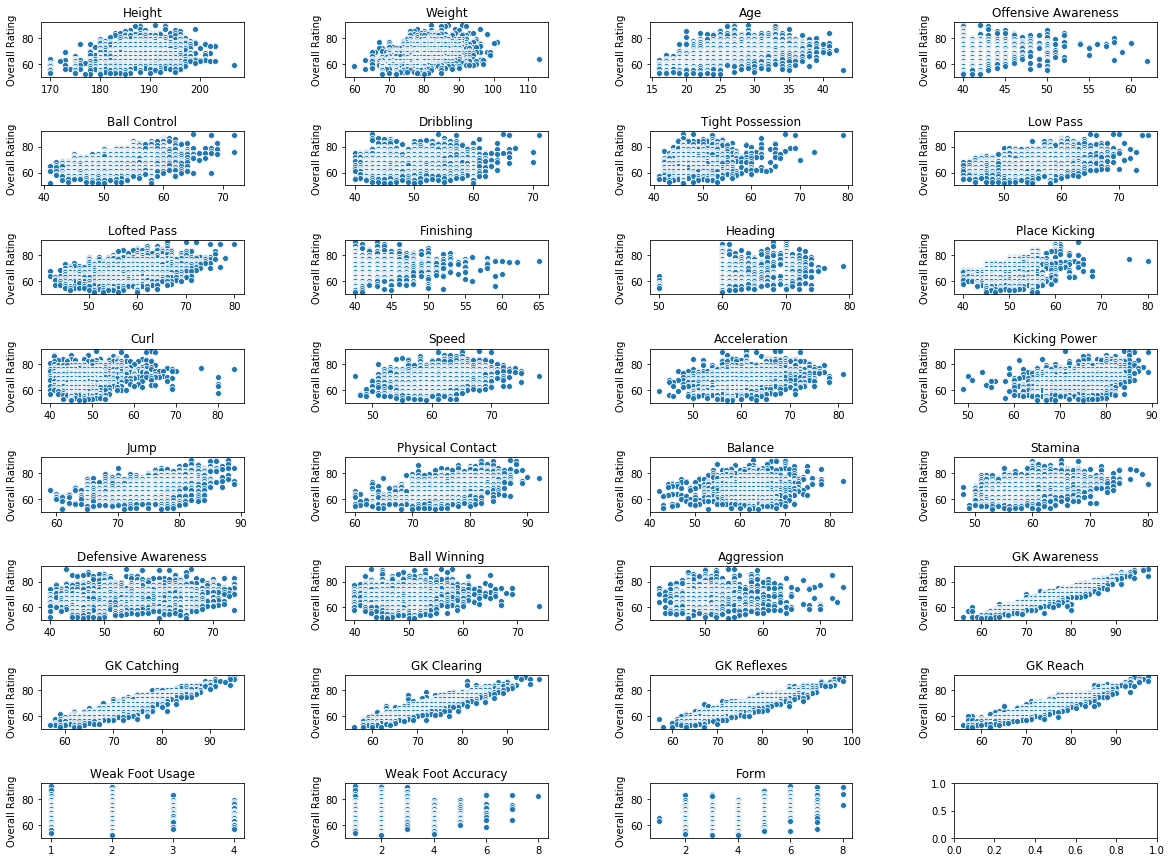

In [47]:
# Let's visualize all the factors first
fig, axes = plt.subplots(8,4,figsize = (20,15))

plt.subplots_adjust(wspace =0.5, hspace =1)

GK = df[(df['Position'] =='GK')]

row = 0
col = 0

for i in variables:
    
    sns.scatterplot(x= i, y = 'Overall Rating',data = GK, ax = axes [row][col]).set(title = i,xlabel = '')
    col += 1
    if col == 4:
        col = 0
        row +=1

In [48]:
# Update the variable
gk_variables = ['Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
             'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
             'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression','GK Awareness',
             'GK Catching','GK Clearing','GK Reflexes','GK Reach','Weak Foot Usage','Weak Foot Accuracy','Form']


X=GK.loc[:,('Height','Weight','Age','Offensive Awareness','Ball Control','Dribbling','Tight Possession',
             'Low Pass','Lofted Pass','Finishing','Heading','Place Kicking','Curl','Speed','Acceleration','Kicking Power',
             'Jump','Physical Contact','Balance','Stamina','Defensive Awareness','Ball Winning','Aggression','GK Awareness',
             'GK Catching','GK Clearing','GK Reflexes','GK Reach','Weak Foot Usage','Weak Foot Accuracy','Form')]

y=GK.loc[:,'Overall Rating']


# Split the data into the training set and the testing set
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=100)

print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, 
                                                                                           X_test.shape,y_test.shape))

linreg = LinearRegression()
model=linreg.fit(X_train, y_train)

X_train.shape=(1236, 31)
 y_train.shape =(1236,)
 X_test.shape=(530, 31)
,  y_test.shape=(530,)


In [49]:
# Try to create a dictionary to store the model
gk_model = {}

gk_model.update({'intercept': linreg.intercept_})

for i in gk_variables:
    gk_model.update({i:linreg.coef_[gk_variables.index(i)]})

# Transfer the dictionary into dataframe for visualization
gk_table = pd.DataFrame.from_dict(gk_model, orient='index').rename(columns = {0:'With Incercept (sklearn)'})

# To compare with, I add an OLS analysis without intercepts 
# (I also test that OLS produces the same result as Scikit-Learn if intercept included)
model = sm.OLS(y_train, X_train).fit()
gk_table['Without Intercept (OLS Result)'] = model.params
gk_table.fillna(0,inplace = True)

gk_table

,With Incercept (sklearn),Without Intercept (OLS Result)
intercept,-21.444274,0.000000
Height,-0.001162,-0.106690
Weight,0.001077,0.018346
Age,0.004012,-0.006186
Offensive Awareness,0.000515,-0.035210
Ball Control,0.007191,0.011848
Dribbling,0.001528,-0.002841
Tight Possession,-0.013769,-0.020959
Low Pass,-0.002647,0.007684
Lofted Pass,-0.001553,0.002030


In [50]:
y_val = linreg.predict(X_test)
predictions = model.predict(X_test) 

print('MAE for the intercept-included model is: ' + str(mean_absolute_error(y_val, y_test)))
print('MSE for the intercept-included model is: ' + str(mean_squared_error(y_val, y_test)))
print('R-squre for the intercept-included model is: ' + str(r2_score(y_test, y_val)))
print('CV score for the intercept-included model is:')
print(cross_val_score(linreg, X_test, y_test, cv=5))


print('\n MAE for the intercept-included model is: ' + str(mean_absolute_error(predictions, y_test)))
print('MSE for the intercept-included model is: ' + str(mean_squared_error(predictions, y_test)))
print('R-squre for the intercept-included model is: ' + str(r2_score(y_test, predictions)))


MAE for the intercept-included model is: 0.31327720707172996
MSE for the intercept-included model is: 0.13772731901896718
R-squre for the intercept-included model is: 0.9971903694575314
CV score for the intercept-included model is:
[0.99746833 0.99772379 0.99647978 0.99703195 0.9968415 ]

 MAE for the intercept-included model is: 0.4623306563438575
MSE for the intercept-included model is: 0.3467826657282666
R-squre for the intercept-included model is: 0.9929256506539953


__From previous analysis, the intercept-included model performs better and will give me a good prediction of a player's overall rating.__

# That is all my analysis. Thank you!